# In this project we shall implement the detecting of emotions on various expressions:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Dropout,Conv2D

# Pre-processing the training and validation files :

Since our training and validation files are gray scale images and of size 48*48 we will use the same size while model building

In [2]:
training_generator=ImageDataGenerator(rescale=1./255)

validation_generator=ImageDataGenerator(rescale=1./255)

training_set=training_generator.flow_from_directory('archive/train/',
                                                    target_size=(48,48),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    color_mode='grayscale')

validation_set=validation_generator.flow_from_directory('archive/test/',
                                                       target_size=(48,48),
                                                       batch_size=64,
                                                       class_mode='categorical',
                                                       color_mode='grayscale')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

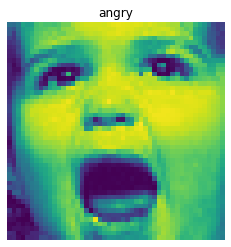

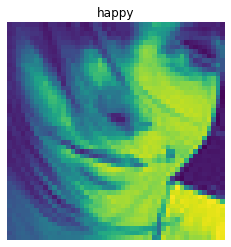

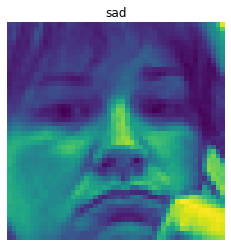

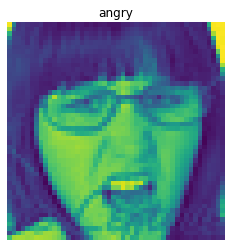

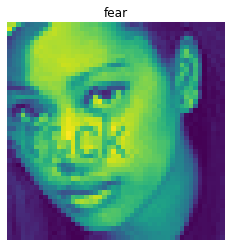

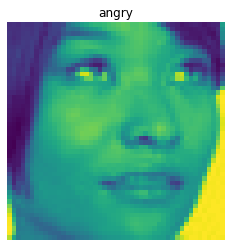

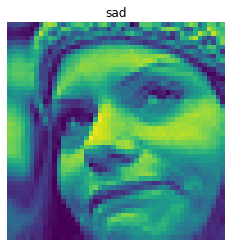

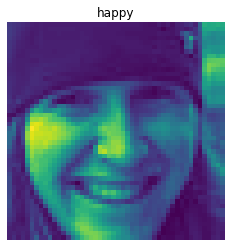

In [4]:
#Visualizing some of the images for each class:
import numpy as np
categories=['angry','disguist','fear','happy','neutral','sad','surprise']

img,label=training_set.next()

for i in range(8):
    plt.imshow(img[i])
    plt.title(categories[np.argmax(label[i])])
    plt.axis('off')
    plt.show()  

In [5]:
# Model building:

model=Sequential()

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

In [7]:
#Compiling the model:

from tensorflow.keras.losses import categorical_crossentropy

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

In [8]:
# Early stopping:

from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.2,patience=5,verbose=1,mode='auto')

In [9]:
#Train the neural network:

history=model.fit_generator(training_set,
                           validation_data=validation_set,
                           epochs=100,
                           steps_per_epoch=len(training_set),
                           validation_steps=len(validation_set),
                           verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
449/449 [==============================] - 396s 883ms/step - loss: 1.8210 - accuracy: 0.2475 - val_loss: 1.8144 - val_accuracy: 0.2471
Epoch 2/100
449/449 [==============================] - 254s 567ms/step - loss: 1.8130 - accuracy: 0.2513 - val_loss: 1.8140 - val_accuracy: 0.2471
Epoch 3/100
449/449 [==============================] - 274s 610ms/step - loss: 1.8118 - accuracy: 0.2512 - val_loss: 1.8139 - val_accuracy: 0.2471
Epoch 4/100
449/449 [==============================] - 337s 751ms/step - loss: 1.7707 - accuracy: 0.2665 - val_loss: 1.6647 - val_accuracy: 0.3325
Epoch 5/100
449/449 [==============================] - 250s 557ms/step - loss: 1.6397 - accuracy: 0.3468 - val_loss: 1.5426 - val_accuracy: 0.4021
Epoch 6/100
449/449 [==============================] - 849s 2s/step - loss: 1.5304 - accuracy: 0.4027 - val_loss: 1.4417 - val_accuracy: 0.4420
Epoch 7/100
449/449 [========================

Epoch 55/100
449/449 [==============================] - 237s 528ms/step - loss: 0.9874 - accuracy: 0.6269 - val_loss: 1.1048 - val_accuracy: 0.5896
Epoch 56/100
449/449 [==============================] - 207s 461ms/step - loss: 0.9854 - accuracy: 0.6245 - val_loss: 1.1013 - val_accuracy: 0.5858
Epoch 57/100
449/449 [==============================] - 227s 506ms/step - loss: 0.9790 - accuracy: 0.6280 - val_loss: 1.0995 - val_accuracy: 0.5889
Epoch 58/100
449/449 [==============================] - 261s 581ms/step - loss: 0.9800 - accuracy: 0.6299 - val_loss: 1.1085 - val_accuracy: 0.5858
Epoch 59/100
449/449 [==============================] - 244s 543ms/step - loss: 0.9678 - accuracy: 0.6332 - val_loss: 1.1264 - val_accuracy: 0.5857
Epoch 60/100
449/449 [==============================] - 414s 921ms/step - loss: 0.9693 - accuracy: 0.6294 - val_loss: 1.1066 - val_accuracy: 0.5874
Epoch 61/100
449/449 [==============================] - 932s 2s/step - loss: 0.9674 - accuracy: 0.6316 - val_los

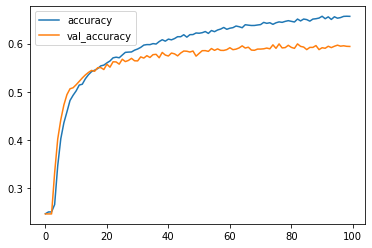

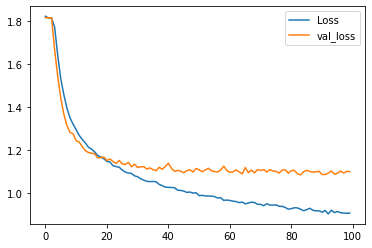

In [10]:
#Plotting accuracy and val_accuracy w.r.t LOSS and Val_LOSS graphs:

history.history.keys()

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# save model structure in json file

In [11]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('emotion_model.h5')